In [1]:
#from google.colab import drive
#drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
%matplotlib inline
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings; warnings.filterwarnings(action='once')
import seaborn as sns
# from pywaffle import Waffle
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import metrics
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
from keras.utils import to_categorical
import keras


# Keras version.
print('Using Keras version', keras.__version__)

sns.set(style="darkgrid")

RANDOM_SEED = 42

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

for dirname, _, filenames in os.walk('/content/gdrive/My Drive/Colab Notebooks/FGA'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(

Using Keras version 2.2.5
/content/gdrive/My Drive/Colab Notebooks/FGA/FuelConsumptionCo2.csv
/content/gdrive/My Drive/Colab Notebooks/FGA/Linear Regresi.ipynb
/content/gdrive/My Drive/Colab Notebooks/FGA/uci-news-aggregator.csv
/content/gdrive/My Drive/Colab Notebooks/FGA/Untitled0.ipynb
/content/gdrive/My Drive/Colab Notebooks/FGA/mushrooms.csv
/content/gdrive/My Drive/Colab Notebooks/FGA/Mushroom CNN.ipynb


In [3]:
# Read data.
data_path = '/content/gdrive/My Drive/Colab Notebooks/FGA/mushrooms.csv'
df = pd.read_csv(data_path)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [6]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
columns = df.columns
for col in columns:
    print('{feat_name}: {feat_values}'.format(feat_name=col, feat_values=df[col].unique()))

class: ['p' 'e']
cap-shape: ['x' 'b' 's' 'f' 'k' 'c']
cap-surface: ['s' 'y' 'f' 'g']
cap-color: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises: ['t' 'f']
odor: ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment: ['f' 'a']
gill-spacing: ['c' 'w']
gill-size: ['n' 'b']
gill-color: ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape: ['e' 't']
stalk-root: ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring: ['s' 'f' 'k' 'y']
stalk-surface-below-ring: ['s' 'f' 'y' 'k']
stalk-color-above-ring: ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring: ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type: ['p']
veil-color: ['w' 'n' 'o' 'y']
ring-number: ['o' 't' 'n']
ring-type: ['p' 'e' 'l' 'f' 'n']
spore-print-color: ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population: ['s' 'n' 'a' 'v' 'y' 'c']
habitat: ['u' 'g' 'm' 'd' 'p' 'w' 'l']


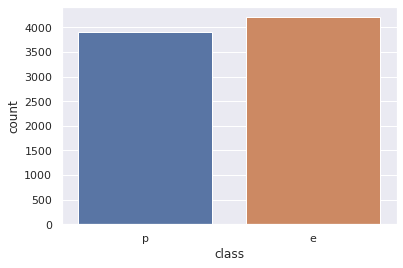

In [8]:
sns.countplot(x='class', data=df)

In [9]:
# First, create the list of labels as our y values.
le = preprocessing.LabelEncoder()
y = le.fit_transform(df['class'])
print(y)

[1 0 0 ... 0 1 0]


In [10]:
# Drop the labels from the dataframe, encode all features.
X = df.drop('class', axis=1)
columns = X.columns
for i in range(len(X.columns)):
    le = preprocessing.LabelEncoder()
    X[columns[i]] = le.fit_transform(X[columns[i]])
    
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [12]:
# Inspect unique values again.
for col in columns:
    print('{}: {}'.format(col, X[col].unique()))

cap-shape: [5 0 4 2 3 1]
cap-surface: [2 3 0 1]
cap-color: [4 9 8 3 2 5 0 7 1 6]
bruises: [1 0]
odor: [6 0 3 5 2 1 8 7 4]
gill-attachment: [1 0]
gill-spacing: [0 1]
gill-size: [1 0]
gill-color: [ 4  5  2  7 10  3  9  1  0  8 11  6]
stalk-shape: [0 1]
stalk-root: [3 2 1 4 0]
stalk-surface-above-ring: [2 0 1 3]
stalk-surface-below-ring: [2 0 3 1]
stalk-color-above-ring: [7 3 6 4 0 2 5 1 8]
stalk-color-below-ring: [7 6 3 0 4 2 8 5 1]
veil-type: [0]
veil-color: [2 0 1 3]
ring-number: [1 2 0]
ring-type: [4 0 2 1 3]
spore-print-color: [2 3 6 1 7 5 4 8 0]
population: [3 2 0 4 5 1]
habitat: [5 1 3 0 4 6 2]


In [13]:
# We need to know the maximum number of possible values for the embedding layer.
# If we were using text, this would be the size of the vocabulary.
# Find number of uniabsque values for each feature.
for col in columns:
    print('{}: {}'.format(col, X[col].nunique()))

cap-shape: 6
cap-surface: 4
cap-color: 10
bruises: 2
odor: 9
gill-attachment: 2
gill-spacing: 2
gill-size: 2
gill-color: 12
stalk-shape: 2
stalk-root: 5
stalk-surface-above-ring: 4
stalk-surface-below-ring: 4
stalk-color-above-ring: 9
stalk-color-below-ring: 9
veil-type: 1
veil-color: 4
ring-number: 3
ring-type: 5
spore-print-color: 9
population: 6
habitat: 7


In [14]:
# Convert features to sequences.
sequences = []
# seq = '{}' * 22
columns = X.columns
for idx, row in X.iterrows():
    sequence = []
    for i in range(len(columns)):
        sequence.append(row[columns[i]])
    sequences.append(sequence)
    
# Print first example and label, length of example sequence.
print('{sequence}: {label}'.format(sequence=sequences[0], label=y[0]))
print('len of sequences:', len(sequences[0]))

[5, 2, 4, 1, 6, 1, 0, 1, 4, 0, 3, 2, 2, 7, 7, 0, 2, 1, 4, 2, 3, 5]: 1
len of sequences: 22


In [16]:
# Build train/test sets.
x_train, x_test, y_train, y_test = train_test_split(sequences, y,
                                                    test_size=0.1,
                                                    random_state=RANDOM_SEED)
# Convert to numpy arrays.
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(x_train)
print(y_train)

[[2 0 9 ... 1 4 0]
 [5 0 5 ... 2 3 0]
 [2 0 2 ... 2 4 0]
 ...
 [2 3 4 ... 3 5 4]
 [3 2 2 ... 7 4 4]
 [3 0 3 ... 7 2 1]]
[1 1 0 ... 0 1 0]


In [0]:
def build_model():
    embeddings_dims = 300
    max_seq_length = len(sequences[0])
    max_features = 12
    filters = 250
    kernel_size = 3
    hidden_dims = 250
    
    using_pretrained_emb = False #@param {type:"boolean"}

    # CNN via Keras.
    model = Sequential()

    if using_pretrained_emb:
      model.add(layers.Embedding(max_features,
                                 embeddings_dims,
                                 embeddings_initializer=Constant(vocab),
                                 input_length=max_seq_length,
                                 trainable=False))
    else:
      model.add(layers.Embedding(max_features,
                                 embeddings_dims,
                                 input_length=max_seq_length))
    model.add(layers.Dropout(0.5))
    model.add(layers.Conv1D(filters,
                            kernel_size,
                            padding='valid',
                            activation='relu',
                            strides=1))
    model.add(layers.MaxPooling1D())
    model.add(layers.Conv1D(filters,
                            kernel_size,
                            padding='valid',
                            activation='relu',
                            strides=1))
    model.add(layers.MaxPooling1D())
    model.add(layers.Conv1D(filters,
                            kernel_size,
                            padding='valid',
                            activation='relu',
                            strides=1))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(hidden_dims))
    model.add(layers.Dropout(0.5))
    model.add(layers.Activation('relu'))
    model.add(layers.Dense(1))
    model.add(layers.Activation('sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adadelta',
                  metrics=['accuracy'])
    
    return model

  # Build the model, check out the summary.


In [25]:
model = build_model()
model.summary()




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 22, 300)           3600      
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 300)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 20, 250)           225250    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 10, 250)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 8, 250)            187750    
_____________________________________

In [26]:
# Train.
history = model.fit(x_train, y_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(x_test, y_test),
                    batch_size=16)




Train on 7311 samples, validate on 813 samples
Epoch 1/10





7311/7311 [==============================] - 12s 2ms/step - loss: 0.0789 - acc: 0.9614 - val_loss: 0.0127 - val_acc: 0.9938
Epoch 2/10
7311/7311 [==============================] - 5s 686us/step - loss: 0.0016 - acc: 0.9992 - val_loss: 1.0043e-05 - val_acc: 1.0000
Epoch 3/10
7311/7311 [==============================] - 5s 688us/step - loss: 8.8314e-05 - acc: 1.0000 - val_loss: 2.6666e-06 - val_acc: 1.0000
Epoch 4/10
7311/7311 [==============================] - 5s 689us/step - loss: 2.2989e-05 - acc: 1.0000 - val_loss: 1.1209e-06 - val_acc: 1.0000
Epoch 5/10
7311/7311 [==============================] - 5s 673us/step - loss: 1.7918e-05 - acc: 1.0000 - val_loss: 8.6604e-07 - val_acc: 1.0000
Epoch 6/10
7311/7311 [==============================] - 5s 685us/step - loss: 8.7783e-06 - acc: 1.0000 - val_loss: 5.0968e-07 - val_acc: 1.0000
Epoch 7/10
7311/7311 [==============================] - 5s 685us/step - loss: 5.3092e-06 - acc

In [28]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
loss_v, accuracy_v = model.evaluate(x_train, y_train, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

7311/7311 [==============================] - 1s 103us/step
Validation: accuracy = 1.000000  ;  loss_v = 0.000000
Test: accuracy = 1.000000  ;  loss = 0.000000


acc: 1.0
prec: 1.0
rec: 1.0
f1: 1.0
f1_macro: 1.0
auc: 1.0


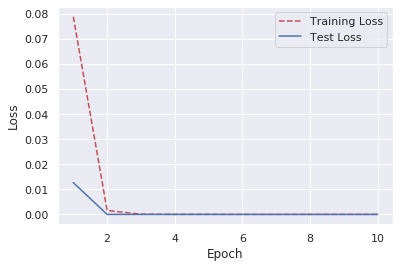

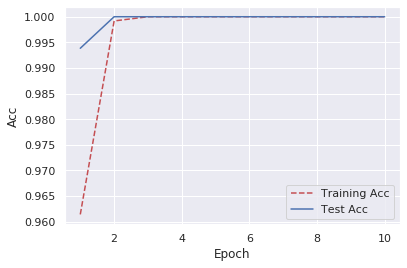

In [29]:
# Get predictions for test set.
preds_test = model.predict_classes(x_test)

cnn_metrics = {'acc': metrics.accuracy_score(y_test, preds_test)}
cnn_metrics['prec'] = metrics.precision_score(y_test, preds_test)
cnn_metrics['rec'] = metrics.recall_score(y_test, preds_test)
cnn_metrics['f1'] = metrics.f1_score(y_test, preds_test)
cnn_metrics['f1_macro'] = metrics.f1_score(y_test, preds_test,
                                           average='macro')
cnn_metrics['auc'] = metrics.roc_auc_score(y_test, preds_test)

for metric in cnn_metrics:
  print('{metric_name}: {metric_value}'.format(metric_name=metric, metric_value=cnn_metrics[metric]))

# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Get training and test accuracy history.
training_acc = history.history['acc']
test_acc = history.history['val_acc']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

# Visualize acc history
plt.plot(epoch_count, training_acc, 'r--')
plt.plot(epoch_count, test_acc, 'b-')
plt.legend(['Training Acc', 'Test Acc'])
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.show();